# Redes Neuronales

En este _notebook_ vamos a aprender a trabajar con Redes Neuronales, que es la técnica más usada en la actualidad para resolver problemas del área de _Machine Learning_. Para esto, vamos a usar Tensorflow y Keras para armar una red neuronal que usa la arquitectura _Multi Layer Perceptron_, que es uno de los modelos sencillo, pero muy útil. Así, vamos a aprender a:

- Instanciar una red neuronal.
- Agregar _hidden layers_ con un número determinado de neuronas.
- Definir las funciones de activación de las capas.
- Entrenar una red neuronal, definiendo el tamaño de los _batches_ de entrenamiento y el número de _epochs_.
- Hacer regresión con una Red Neuronal.

Para esto necesitamos tener instalado Tensorflow. Esta es una librería que nos permite definir grafos de computo. Nosotros vamos a usar una interfaz de alto nivel sobre esta librería llamada _Keras_, que nos permite definir Redes Neuronales de forma muy sencilla. Para instalar Tensorflow se puede hacer con `pip`:

```
pip install tensorflow
```

Ahora vamos a entrenar una red neuronal sobre el _dataset Iris_.

In [265]:
from tensorflow import keras
from tensorflow.keras import layers

# Siempre es buena práctica reiniciar el modelo
keras.backend.clear_session()

# Para tener resultados replicables descomentar las líneas de abajo
# np.random.seed(42)
# tf.random.set_seed(42)

# Instanciamos un modelo "Secuencial", que corresponde a una secuencia de capas
model = keras.Sequential(
    [
        layers.Dense(5, activation='relu', input_shape=(2,), name='hidden_layer_1'),
        layers.Dense(10, activation='relu', name='hidden_layer_2'),
        layers.Dense(3, activation='softmax', name='output_layer'),
    ]
)

# Declaramos dos hidden layers: la primera con 5 neuronas y la segunda 10 neuronas cada una,
# en la primera capa declaramos el tamaño del input y en la última capa declaramos una 
# una activación softmax para que el output represente una probabilidad

# Obtenemos un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 5)                 15        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 10)                60        
_________________________________________________________________
output_layer (Dense)         (None, 3)                 33        
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


Vemos que al indicar el resumen del modelo, el número de parámetros calza según lo visto en clases (recordemos que cada neurona tiene asociado un _bias_). Ahora vamos a entrenar nuestro modelo.

In [266]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:,2:] # Nos quedamos con el largo y ancho del pétalo
y = iris.target

# Hacemos la división
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Compilamos la red neuronal
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='sgd', metrics=['accuracy'])

# Compilamos la red neuronal pero entregando una learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

Algunas acotaciones sobre el la compilación del modelo:

- Dado que en este modelo estamos usando variables categóricas exclusivas (es decir, una flor no puede ser de dos tipos), usamos `sparse_categorical_cross_entropy`. Si queremos que las clases no sean exclusivas, utilizamos `categorical_cross_entropy`, pero las categorías deben estar con _encoding one hot_.
- `sgd` es para utilizar _Stochastic Gradient Descent_.
- `accuracy` es para que se nos muestre el _accuracy_ durante el entrenamiento.
- Para clasificación binaria, en vez de una activación `softmax` se usa una activación `sigmoid`, además la función de pérdida pasa a ser `binary_crossentropy`.

Ahora vamos a hacer `fit` del modelo.

In [267]:
model.fit(X_train, y_train, batch_size=16, epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2025 - accuracy: 0.2476
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 1.0868 - accuracy: 0.2571
Epoch 3/200
7/7 [==============================] - 0s 996us/step - loss: 1.0466 - accuracy: 0.3238
Epoch 4/200
7/7 [==============================] - 0s 1ms/step - loss: 1.0227 - accuracy: 0.3238
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.3238
Epoch 6/200
7/7 [==============================] - 0s 1ms/step - loss: 0.9995 - accuracy: 0.3238
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 0.9973 - accuracy: 0.3238
Epoch 8/200
7/7 [==============================] - 0s 1ms/step - loss: 0.9886 - accuracy: 0.3238
Epoch 9/200
7/7 [==============================] - 0s 1ms/step - loss: 0.9797 - accuracy: 0.3238
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 0.9722 - accuracy: 0.3238
Epoch 11/200
7/7 [=========

Como vemos, en cada _epoch_ fue incrementando el _accuracy_ sobre el _dataset_ de entrenamiento. Ahora vamos a predecir sobre el _dataset_ de prueba.

In [268]:
# Aquí obtenemos un vector de probabilidades
y_proba = model.predict(X_test)
# Que redondeamos a dos decimales
y_proba.round(2)

array([[0.02, 0.57, 0.41],
       [0.8 , 0.14, 0.06],
       [0.03, 0.65, 0.32],
       [0.  , 0.25, 0.75],
       [0.01, 0.51, 0.49],
       [0.03, 0.62, 0.35],
       [0.  , 0.17, 0.83],
       [0.8 , 0.14, 0.06],
       [0.68, 0.24, 0.08],
       [0.8 , 0.14, 0.06],
       [0.  , 0.19, 0.81],
       [0.  , 0.25, 0.75],
       [0.  , 0.34, 0.66],
       [0.69, 0.24, 0.08],
       [0.  , 0.31, 0.68],
       [0.8 , 0.14, 0.06],
       [0.8 , 0.14, 0.06],
       [0.  , 0.42, 0.57],
       [0.  , 0.36, 0.64],
       [0.01, 0.53, 0.46],
       [0.8 , 0.14, 0.06],
       [0.8 , 0.14, 0.06],
       [0.  , 0.19, 0.81],
       [0.8 , 0.15, 0.06],
       [0.01, 0.56, 0.43],
       [0.  , 0.24, 0.76],
       [0.01, 0.53, 0.46],
       [0.06, 0.67, 0.27],
       [0.01, 0.56, 0.42],
       [0.75, 0.18, 0.07],
       [0.03, 0.61, 0.36],
       [0.  , 0.3 , 0.7 ],
       [0.  , 0.35, 0.65],
       [0.02, 0.6 , 0.38],
       [0.8 , 0.14, 0.06],
       [0.01, 0.56, 0.43],
       [0.02, 0.54, 0.44],
 

In [269]:
# Y ahora para mostrar la clase
import numpy as np
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0,
       2])

Vamos a comparar con nuestro _dataset_ de prueba:

In [270]:
np.sum(y_pred == y_test) / len(y_pred)

0.9333333333333333

Vamos a graficar ahora la frontera de decisión.

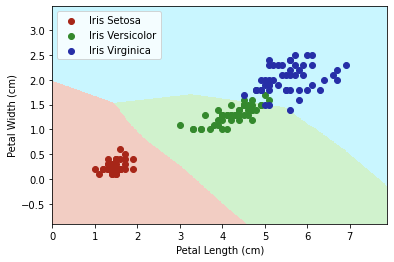

In [271]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecimos sobre el plano con la red neuronal
y_proba = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Y lo convertimos a valores
Z = np.argmax(y_proba, axis=-1)

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Como vemos, la clasificación realizada por la red es muy distinta a la que nos habíamos encontrado hasta ahora. Ahora, un buen ejercicio es probar qué pasa con más neuronas en una de las capas.

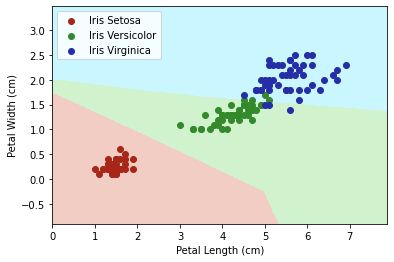

In [272]:
# Instanciamos un modelo "Secuencial"

# Siempre es buena práctica reiniciar el modelo
keras.backend.clear_session()

model = keras.Sequential(
    [
        layers.Dense(5, activation='relu', input_shape=(2,), name='hidden_layer_1'),
        layers.Dense(20, activation='relu', name='hidden_layer_2'),
        layers.Dense(3, activation='softmax', name='output_layer'),
    ]
)

# Compilamos la red neuronal
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=0)

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecimos sobre el plano con la red neuronal
y_proba = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Y lo convertimos a valores
Z = np.argmax(y_proba, axis=-1)

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Ahora, una buena idea también es entender como cambia la decisión con otras funciones de activación.

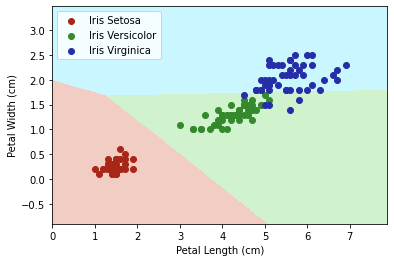

In [273]:
# Instanciamos un modelo "Secuencial"

# Siempre es buena práctica reiniciar el modelo
keras.backend.clear_session()

model = keras.Sequential(
    [
        layers.Dense(5, activation='linear', input_shape=(2,), name='hidden_layer_1'),
        layers.Dense(10, activation='linear', name='hidden_layer_2'),
        layers.Dense(3, activation='softmax', name='output_layer'),
    ]
)

# Compilamos la red neuronal
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=0)

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecimos sobre el plano con la red neuronal
y_proba = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Y lo convertimos a valores
Z = np.argmax(y_proba, axis=-1)

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Como vemos, la activación lineal hace que la clasificación sea básicamente lineal en la separación de las clases.

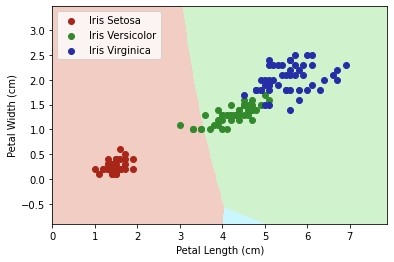

In [274]:
# Instanciamos un modelo "Secuencial"

# Siempre es buena práctica reiniciar el modelo
keras.backend.clear_session()

model = keras.Sequential(
    [
        layers.Dense(5, activation='sigmoid', input_shape=(2,), name='hidden_layer_1'),
        layers.Dense(10, activation='sigmoid', name='hidden_layer_2'),
        layers.Dense(3, activation='softmax', name='output_layer'),
    ]
)

# Compilamos la red neuronal
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=0)

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecimos sobre el plano con la red neuronal
y_proba = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Y lo convertimos a valores
Z = np.argmax(y_proba, axis=-1)

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Y como vemos, la función sigmoide no parece ser una buena elección para este problema. Ahora vamos a ver un segundo ejemplo sobre el _dataset_ Fashion MNIST.

## Fashion MNIST

Este _dataset_ es similar al _dataset_ MNIST, solo que aquí vamos a clasificar prendas de ropa en distintos tipos.

In [275]:
fashion_mnist = keras.datasets.fashion_mnist

# Cargamos los Datasets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [276]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [277]:
# Creamos datasets de entrenamiento, validación y prueba
# Las features se dividen en 255. para que los valores queden entre 0 y 1.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Las clases son números, su significado es el siguiente.

In [278]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

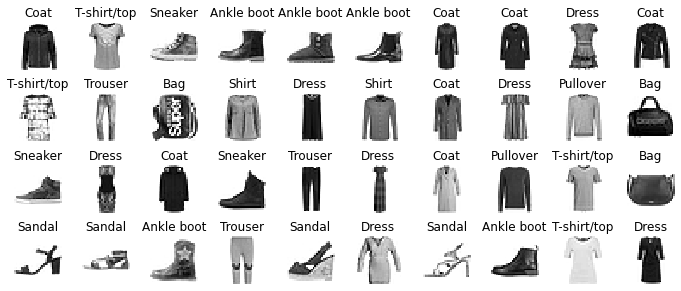

In [279]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [280]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# La capa flatten es para recibir la imagen de 28x28 sin transformar el dataset de entrenamiento
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# El batch size default es de 32
history = model.fit(X_train, y_train, verbose=0, epochs=30,
                    validation_data=(X_valid, y_valid))

Ahora vamos a graficar cómo se comportó el modelo durante el entrenamiento.

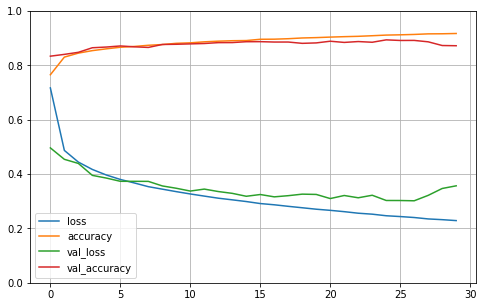

In [282]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Ahora para evaluar sobre los datos de prueba.

In [283]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8586


[0.3950877785682678, 0.8586000204086304]

Que no está nada de mal para una tarea súper compleja. Uno además puede hacer _fine tune_ de varios hiperparámetros para mejorar el rendimiento. Si bien podemos usar `GridSearchCV` para encontrar buenos hiperparámetros, hay librerías optimizadas para Keras. Una de ellas es [la siguiente librería](https://www.tensorflow.org/tutorials/keras/keras_tuner).

## Regresión y redes neuronales.

Como mencionamos antes, para hacer regresión con una red neuronal, la técnica que se usa en general es tener una única neurona de salida (y generalmente, sin una función de activación asociada), además de cambiar la función de pérdida por `mean_squared_error`. Vamos a ver un ejemplo.

In [324]:
# Generamos el dataset

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-2))
history = model.fit(X, y, epochs=100, verbose=0)

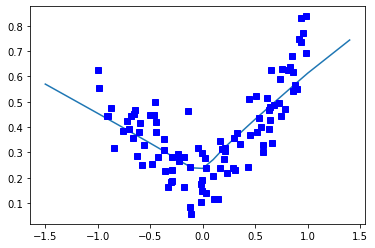

In [325]:
X_p = np.arange(-1.5, 1.5, 0.1)
X_p = X_p.reshape(-1, 1)

plt.plot(X_p, model.predict(X_p))
plt.plot(X, y, 'bs')